In [137]:
#Se importan las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np

In [138]:
#Se inicializa una poblacion de cromosomas para encontrar ruta mas corta

def generarCromosoma(numeroCiudades):
    cromosoma = np.random.choice(numeroCiudades, numeroCiudades, replace=False)
    return cromosoma

def generarPoblacion(numeroCromosomas, numeroCiudades):
    resultado = []
    for cromContador in range(numeroCromosomas):
        resultado += [generarCromosoma(numeroCiudades)]
    resultado = np.array(resultado)
    return resultado



In [139]:
def calculoCordenadas(numeroCiudad):
    cordenadaX = 0.1 * ((9+13 * numeroCiudad**2) % 200 )
    cordenadaY = 0.1 * ((7 + 1327 * numeroCiudad) % 200)
    resultado = [cordenadaX, cordenadaY]
    return resultado

#Para simplificar la computacion del programa calcularemos las cordenadas para cada ciudad de antemano
def cordenadasGlobales(numeroCiudades):
    conjuntoCordenadas = []
    for ciudad in range(numeroCiudades):
        conjuntoCordenadas += [calculoCordenadas(ciudad)]
    return conjuntoCordenadas

cordenadasCiudades = cordenadasGlobales(100)

#Generamos la funcion de ajuste para evaluar el programa
def funcionAjuste(cromosoma):
    distanciaEuclidiana = 0
    contador = 0
    cord1 = []
    cord2 = []
    for ciudad in cromosoma-1:
        #Se utiliza el siguiente condicional para definir la lista del cromosoma como una trayectoria cerrada
        if contador == cromosoma.size-1:
            cord2 = cordenadasCiudades[cromosoma[0]]
        else:
            cord2 = cordenadasCiudades[cromosoma[contador+1]]
        cord1 = cordenadasCiudades[cromosoma[contador]]
        distanciaEuclidiana += euclidiana(cord1, cord2)
        contador += 1
    ajuste = 1/distanciaEuclidiana
    return ajuste

def euclidiana(cord1, cord2):
    x1 = cord1[0]
    x2 = cord2[0]
    y1 = cord1[1]
    y2 = cord2[1]
    distancia = ((x1 - x2)**2 + (y1 - y2)**2)**(1/2)
    return distancia



funcionAjuste(generarCromosoma(100))


0.0009473822973703297

In [140]:
#Programamos un operador de mutacion que se le aplicara a todos los cromosomas con una probabilidad p
def operadorMutación(cromosoma, p_mut):
    """
    Escriba una función que realice la mutación de un cromosoma con probabilidad p_mut
    """
    cromosomaMutado = np.copy(cromosoma)
    r = np.random.random()
    valoresIntercambiar = np.random.choice(cromosoma, 2, replace=False)

    if r < p_mut:
        cromosomaMutado[valoresIntercambiar[0]] = cromosoma[valoresIntercambiar[1]]
        cromosomaMutado[valoresIntercambiar[1]] = cromosoma[valoresIntercambiar[0]]

    return cromosomaMutado



0.0010308511197048202
[99  0 10 86 56 14 66 15 43 30  4 91 69 71 29 49 62 64 72 78 33 44 31 96
 90 57  7 74 65 46 38 59 16 41 17 18  8 61 23 55 83 87 93 75 11 89 70 42
 97 73 35 68 20 45  9  1 47 32 51 63 79 94 52 12 36 27 92 22 25 53  6 80
 28 48 40 37 13 82  2 39 84  5 88 98 85 67 60 95 81 54 26 21  3 24 19 50
 58 77 34 76]


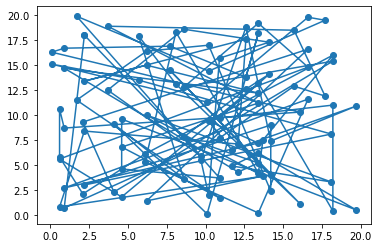

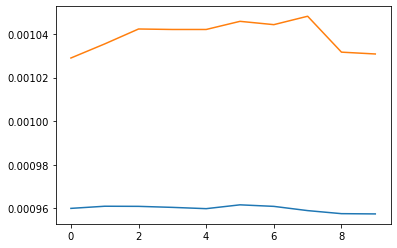

In [154]:
def buscarRutaMasCorta1():
    global cordenadasCiudades


    numeroCiudades = 100
    numeroCromosomas = 50
    promedios = []
    mejores = []
    cordenadasCiudades = cordenadasGlobales(numeroCiudades)
    poblacion = generarPoblacion(numeroCromosomas, numeroCiudades)
    for i in range(10):
        contador = 0
        for individuo in poblacion:
            poblacion[contador] = operadorMutación(individuo, 0.6)
            contador += 1
        promedios += [valoresPromedio(poblacion)]
        mejorRuta, mejoreAjuste = seleccionadorMejor(poblacion)
        mejores += [mejoreAjuste]
    mejorRuta, mejorAjuste = seleccionadorMejor(poblacion)
    fig, ax = plt.subplots()
    fig2, ax2 = plt.subplots()
    arregloAGraficar = definirArregloGrafica(mejorRuta)
    print(mejorAjuste)
    print(mejorRuta)
    arregloAGraficar = np.array(arregloAGraficar)
    traspuesto = separarComponentes(arregloAGraficar)
    ax.plot(traspuesto[0], traspuesto[1])
    ax.scatter(traspuesto[0], traspuesto[1])
    ax2.plot(promedios)
    ax2.plot(mejores)
    plt.show()


def valoresPromedio(poblacion):
    ajustes = []
    pobCopia = np.copy(np.array(poblacion))
    for individuo in pobCopia:
        ajustes += [funcionAjuste(individuo)]
    ajustes = np.array(ajustes)
    promedio = np.average(ajustes)
    return promedio

def definirArregloGrafica(orden):
    global cordenadasCiudades
    cords = cordenadasCiudades
    arreglo = []
    for elemento in orden:
        arreglo += [cords[elemento]]
    arreglo += [cords[orden[0]]]
    return arreglo

def separarComponentes(arreglo):
    compX = []
    compY = []
    for elemento in arreglo:
        compX += [elemento[0]]
        compY += [elemento[1]]
    resultado = [compX] + [compY]
    resultado = np.array(resultado)
    return resultado


def seleccionadorMejor(poblacion):
    ajustes = []
    for individuo in poblacion:
        ajustes += [funcionAjuste(individuo)]
    mejorAjuste = np.amax(ajustes)
    mejorRuta = poblacion[np.argmax(ajustes)]
    return mejorRuta, mejorAjuste


buscarRutaMasCorta1()

0.005238015190288178
[70 70 81 10 32 54 46 68  5 16 79 35 65 95 84 21 29 48 67 56 89 26 62 38
 11 74 52 71 85 30 19 90 24 76 73  2 98 57 43 92  7 59 34  1 20 72 28 80
 99 66 36 91  9 64 94 12 23 78 97 45 15 75 53 42 86 83 61 39 17 14 33 44
 58 25 47  3 55 69 50 31  6 88 77 96  4 37 40 51 18 13 87 60 49 82 63  8
 93 41 27 22]


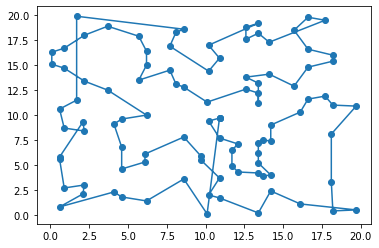

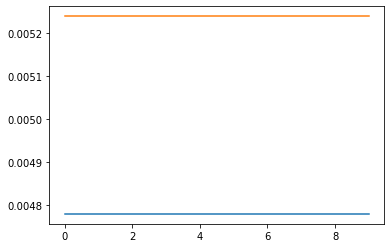

In [159]:
#Segunda parte

def segundaFormaDeCromosoma(nCiudades):
    cromosoma = []
    ciudadesLista = np.arange(1, nCiudades, 1)
    primerElemento = np.random.randint(1, nCiudades)
    cromosoma += [primerElemento]
    for i in range(nCiudades - 1):
        ciudadesLista, elemento = nodoMasCercano(cromosoma[-1], ciudadesLista)
        cromosoma += [elemento]
    return cromosoma


def nodoMasCercano(nNodo, ciudades ):
    global cordenadasCiudades
    listaRetornar = np.copy(ciudades)
    distancias = []
    for ciudad in ciudades:
        distancias += [euclidiana(cordenadasCiudades[nNodo], cordenadasCiudades[ciudad])]
    distancias = np.array(distancias)
    indiceElemento = np.argmin(distancias)
    listaRetornar = np.delete(listaRetornar, indiceElemento)
    elemento = ciudades[indiceElemento]
    return listaRetornar, elemento



def segundaFormaPoblacion(nCiudades, nCromosomas):
    poblacion = []
    for i in range(nCromosomas):
        poblacion += [segundaFormaDeCromosoma(nCiudades)]
    poblacion = np.array(poblacion)
    return poblacion


def buscarRutaMasCorta2():
    global cordenadasCiudades
    promedios = []
    mejores = []

    numeroCiudades = 100
    numeroCromosomas = 50

    cordenadasCiudades = cordenadasGlobales(numeroCiudades)
    poblacion = segundaFormaPoblacion(numeroCiudades, numeroCromosomas)
    for i in range(10):
        contador = 0
        for individuo in poblacion:
            poblacion[contador] = operadorMutación(individuo, 0)
            contador += 1
        promedios += [valoresPromedio(poblacion)]
        mejorRuta, mejoreAjuste = seleccionadorMejor(poblacion)
        mejores += [mejoreAjuste]
    mejorRuta, mejorAjuste = seleccionadorMejor(poblacion)
    fig, ax = plt.subplots()
    fig2, ax2 = plt.subplots()
    arregloAGraficar = definirArregloGrafica(mejorRuta)
    print(mejorAjuste)
    print(mejorRuta)
    arregloAGraficar = np.array(arregloAGraficar)
    traspuesto = separarComponentes(arregloAGraficar)
    ax.plot(traspuesto[0], traspuesto[1])
    ax.scatter(traspuesto[0], traspuesto[1])
    ax2.plot(promedios)
    ax2.plot(mejores)
    plt.show()

buscarRutaMasCorta2()

[1 4 5]
